In [1]:
install.packages('sf')
install.packages('ggplot2')
install.packages('classInt')
install.packages('tidyverse')
install.packages('ggmap')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘processx’, ‘rprojroot’, ‘pkgbuild’, ‘diffobj’, ‘rematch2’, ‘brio’, ‘callr’, ‘cli’, ‘desc’, ‘ellipsis’, ‘lifecycle’, ‘pkgload’, ‘praise’, ‘ps’, ‘rlang’, ‘waldo’, ‘withr’, ‘testthat’, ‘isoband’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘blob’, ‘glue’, ‘tidyselect’, ‘vctrs’, ‘cpp11’, ‘dbplyr’, ‘dplyr’, ‘haven’, ‘hms’, ‘httr’, ‘modelr’, ‘pillar’, ‘purrr’, ‘reprex’, ‘rvest’, ‘tibble’, ‘tidyr’, ‘xml2’

Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’

Warning message in install.packages("ggmap"):
“installation of packa

In [1]:
# Import libraries
library(sf)
library(ggplot2)
library(classInt)
library(rgdal)
library(rgeos)

Linking to GEOS 3.8.1, GDAL 3.1.4, PROJ 7.1.1
Loading required package: sp
rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.4, released 2020/10/20
Path to GDAL shared files: /home/wojtek/anaconda3/envs/r_env/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.1.1, September 1st, 2020, [PJ_VERSION: 711]
Path to PROJ shared files: /home/wojtek/anaconda3/envs/r_env/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-2
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.1-CAPI-1.13.3 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 



In [2]:
# Open files

# Open Philadelphia homicides database
path_hom <- "./data/PhillyHomicides/"
philly_hom <- st_read(dsn=path_hom, "PhillyHomicides")

# Open Philadelphia education database
path_edu <- "./data/PhiladelphiaEduAttain.csv"
philly_edu <- st_read(dsn=path_edu)

# Open Philadelphia region database
path <- "./data/Philly/"
philly <- st_read(dsn=path, "PhillyTotalPopHHinc")

Reading layer `PhillyHomicides' from data source `/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/PhillyHomicides' using driver `ESRI Shapefile'
Simple feature collection with 3883 features and 8 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -75.26809 ymin: 39.87503 xmax: -74.95874 ymax: 40.13086
geographic CRS: WGS 84
Reading layer `PhiladelphiaEduAttain' from data source `/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/PhiladelphiaEduAttain.csv' using driver `CSV'


Warning message:
“no simple feature geometries present: returning a data.frame or tbl_df”

Reading layer `PhillyTotalPopHHinc' from data source `/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/Philly' using driver `ESRI Shapefile'
Simple feature collection with 384 features and 17 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 1739497 ymin: 457343.7 xmax: 1764030 ymax: 490544.9
projected CRS:  Albers


In [3]:
names(philly_hom)
names(philly_edu)
names(philly)

[1] "DC_DIST"    "SECTOR"     "DISPATCH_D" "DISPATCH_T" "LOCATIO"   
[6] "UCR_GEN"    "OBJ_ID"     "TEXT_GE"    "geometry"

[1] "GEOID"           "NAME"            "fem_bachelor"    "fem_doctorate"  
 [5] "fem_highschool"  "fem_noschool"    "fem_ovr_25"      "male_bachelor"  
 [9] "male_doctorate"  "male_highschool" "male_noschool"   "male_ovr_25"    
[13] "pop_ovr_25"

[1] "STATEFP10"  "COUNTYFP10" "TRACTCE10"  "GEOID10"    "NAME10"    
 [6] "NAMELSAD10" "MTFCC10"    "FUNCSTAT10" "ALAND10"    "AWATER10"  
[11] "INTPTLAT10" "INTPTLON10" "GISJOIN"    "Shape_area" "Shape_len" 
[16] "medHHinc"   "totalPop"   "geometry"

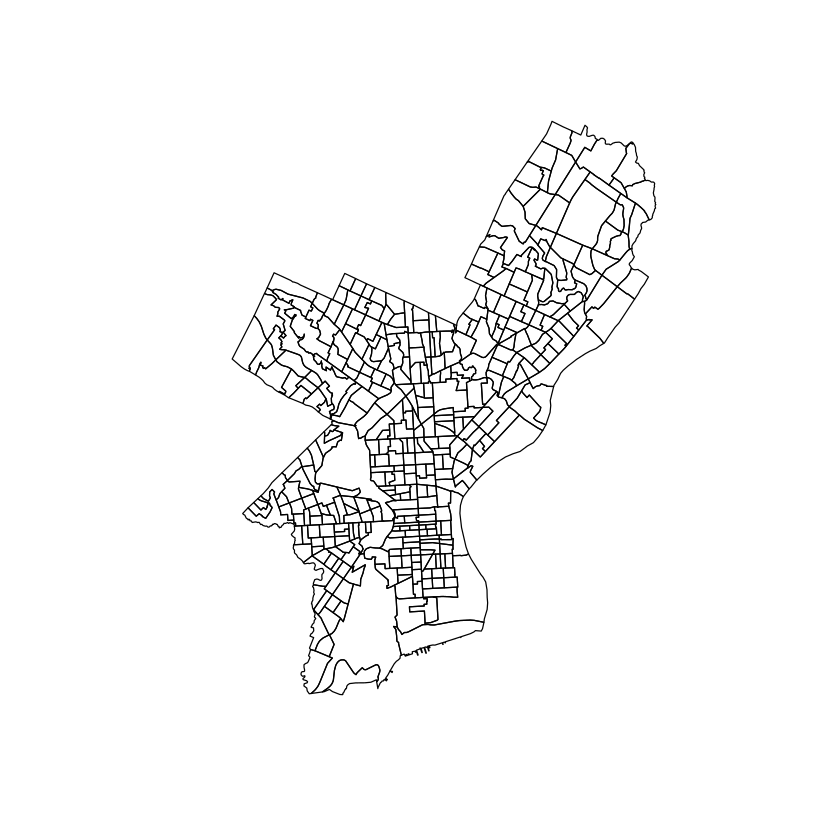

In [4]:
# Disply only geometry
plot(st_geometry(philly))

Warning message:
“plotting the first 9 out of 17 attributes; use max.plot = 17 to plot all”

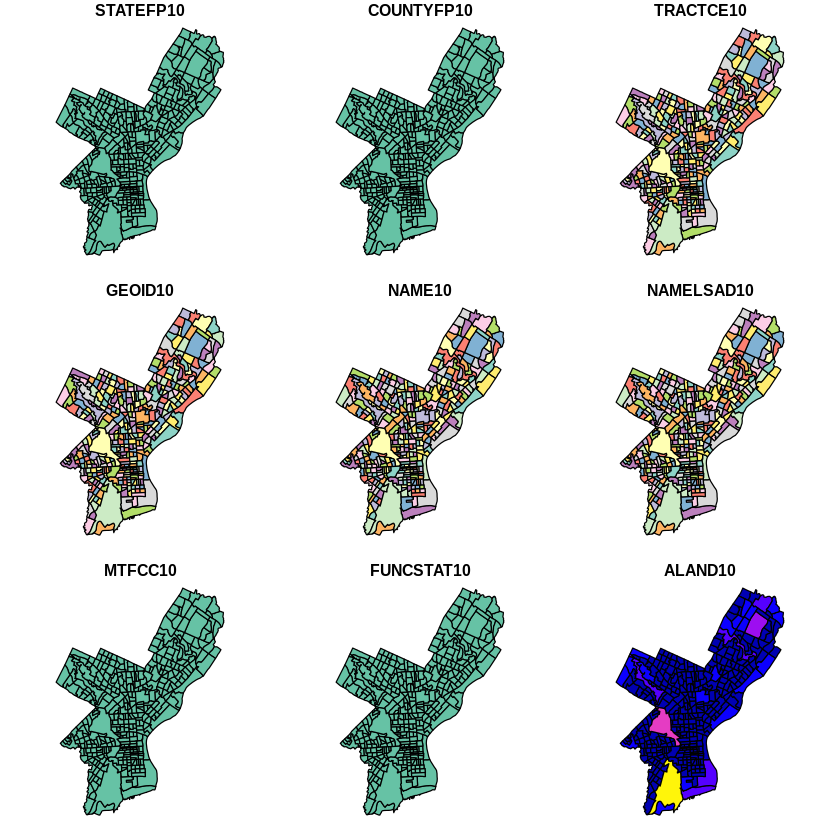

In [5]:
# Total population
plot(philly)

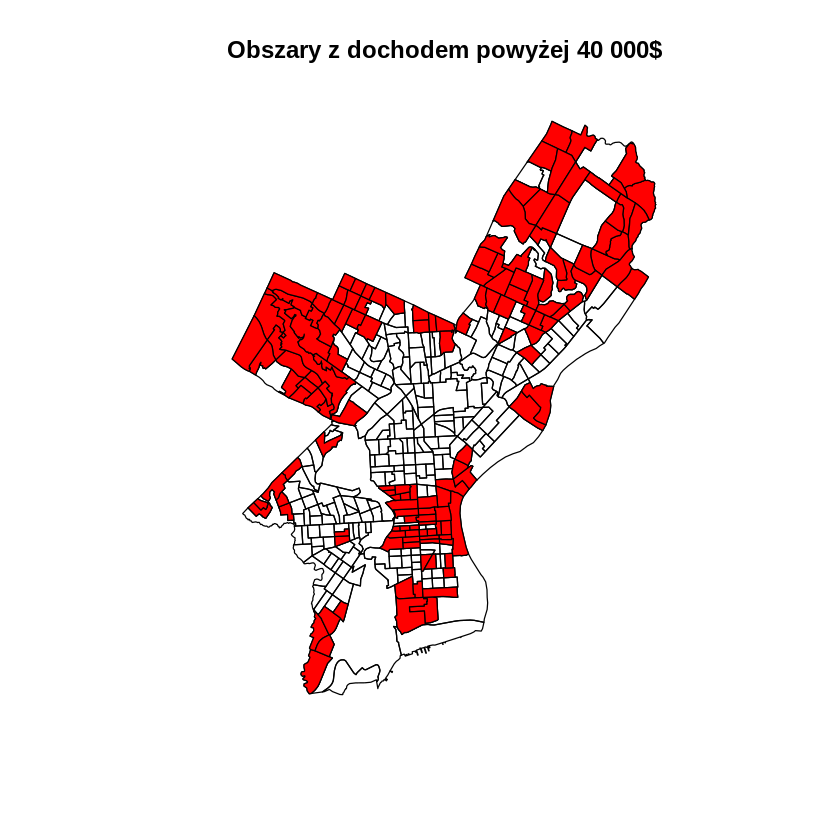

In [6]:
# Subset where household income is more than 40 000$
plot(st_geometry(philly), main="Obszary z dochodem powyżej 40 000$")
philly_40k <- subset(philly, medHHinc > 40000)
plot(st_geometry(philly_40k), add=T, col="red")

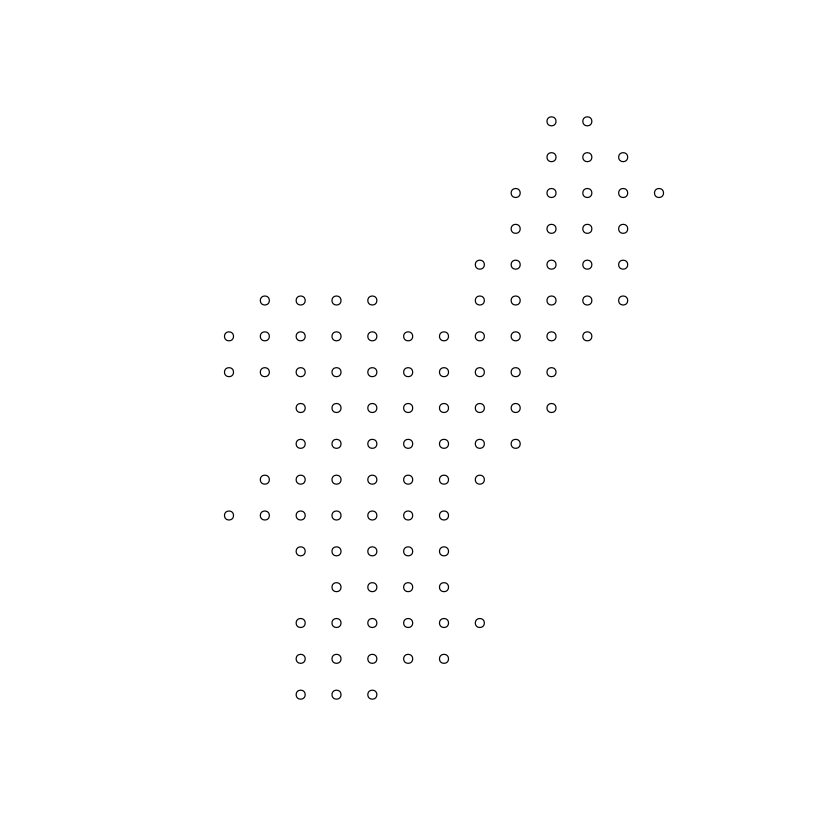

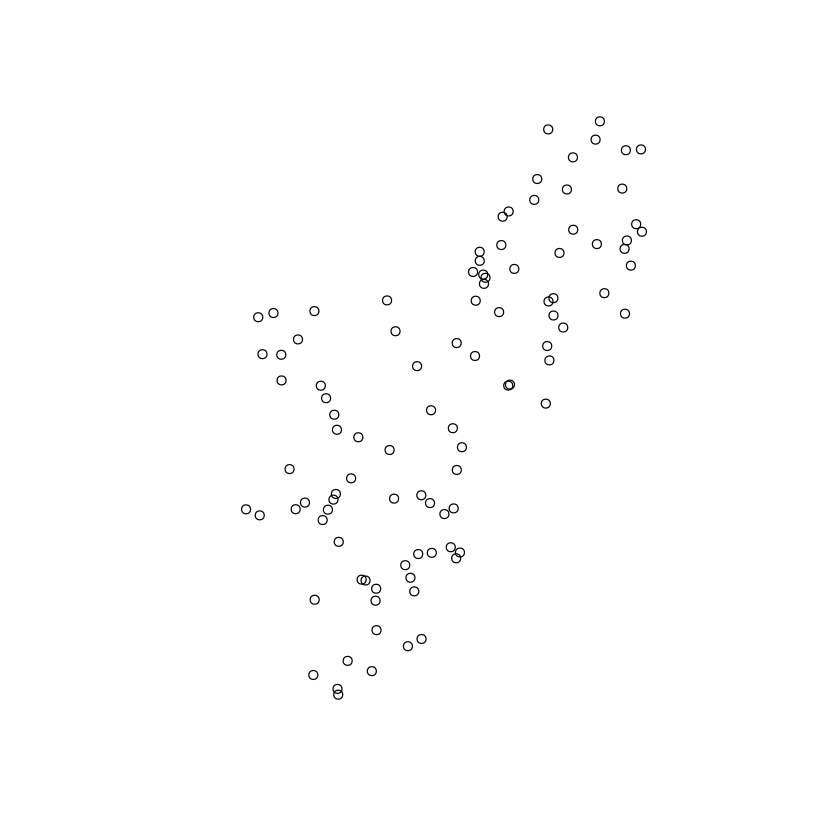

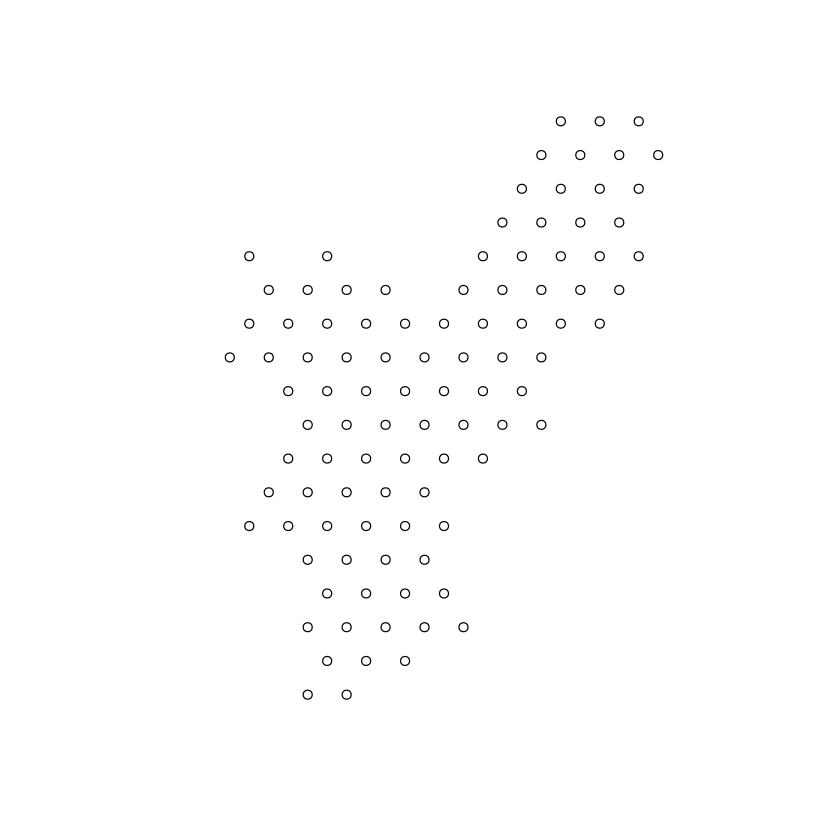

In [11]:
# Sampling
# par(mfrow=c(2, 2))

# set.seed(225)
regular <- st_sample(philly, 100, type="regular", pretty=TRUE)
plot(regular)

# set.seed(225)
random <- st_sample(philly, 100, type="random", pretty=TRUE)
plot(random)

# set.seed(225)
hexagonal <- st_sample(philly, 100, type="hexagonal", pretty=TRUE)
plot(hexagonal)

# set.seed(225)

In [12]:
# Join database
philly_merge_edu <- merge(philly, philly_edu, by.x="GEOID10", by.y="GEOID")

# Dislay results
names(philly_merge_edu)

[1] "GEOID10"         "STATEFP10"       "COUNTYFP10"      "TRACTCE10"      
 [5] "NAME10"          "NAMELSAD10"      "MTFCC10"         "FUNCSTAT10"     
 [9] "ALAND10"         "AWATER10"        "INTPTLAT10"      "INTPTLON10"     
[13] "GISJOIN"         "Shape_area"      "Shape_len"       "medHHinc"       
[17] "totalPop"        "NAME"            "fem_bachelor"    "fem_doctorate"  
[21] "fem_highschool"  "fem_noschool"    "fem_ovr_25"      "male_bachelor"  
[25] "male_doctorate"  "male_highschool" "male_noschool"   "male_ovr_25"    
[29] "pop_ovr_25"      "geometry"

In [29]:
# Reprojecting

# Check current coordinates
range(st_coordinates(philly))
range(st_coordinates(philly_hom))

st_crs(philly)
st_crs(philly_hom)

# Transform
philly_hom_proj <- st_transform(philly_hom, st_crs(philly))

# Check results
range(st_coordinates(philly))
range(st_coordinates(philly_hom_proj))


st_crs(philly)
st_crs(philly_hom_proj)


[1]       1 1764030

[1] -75.26809  40.13086

Coordinate Reference System:
  User input: Albers 
  wkt:
PROJCRS["Albers",
    BASEGEOGCRS["GCS_GRS 1980(IUGG, 1980)",
        DATUM["D_unknown",
            ELLIPSOID["GRS80",6378137,298.257222101,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",37.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-96,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",29.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",45.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8824

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

[1]       1 1764030

[1]  457489.7 1763671.8

Coordinate Reference System:
  User input: Albers 
  wkt:
PROJCRS["Albers",
    BASEGEOGCRS["GCS_GRS 1980(IUGG, 1980)",
        DATUM["D_unknown",
            ELLIPSOID["GRS80",6378137,298.257222101,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",37.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-96,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",29.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",45.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8824

Coordinate Reference System:
  User input: Albers 
  wkt:
PROJCRS["Albers",
    BASEGEOGCRS["GCS_GRS 1980(IUGG, 1980)",
        DATUM["D_unknown",
            ELLIPSOID["GRS80",6378137,298.257222101,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",37.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-96,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",29.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",45.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8824

In [16]:
# Spatial aggregation
philly_aggr <- aggregate(x=philly_hom_proj["OBJ_ID"], by=philly, FUN=length)

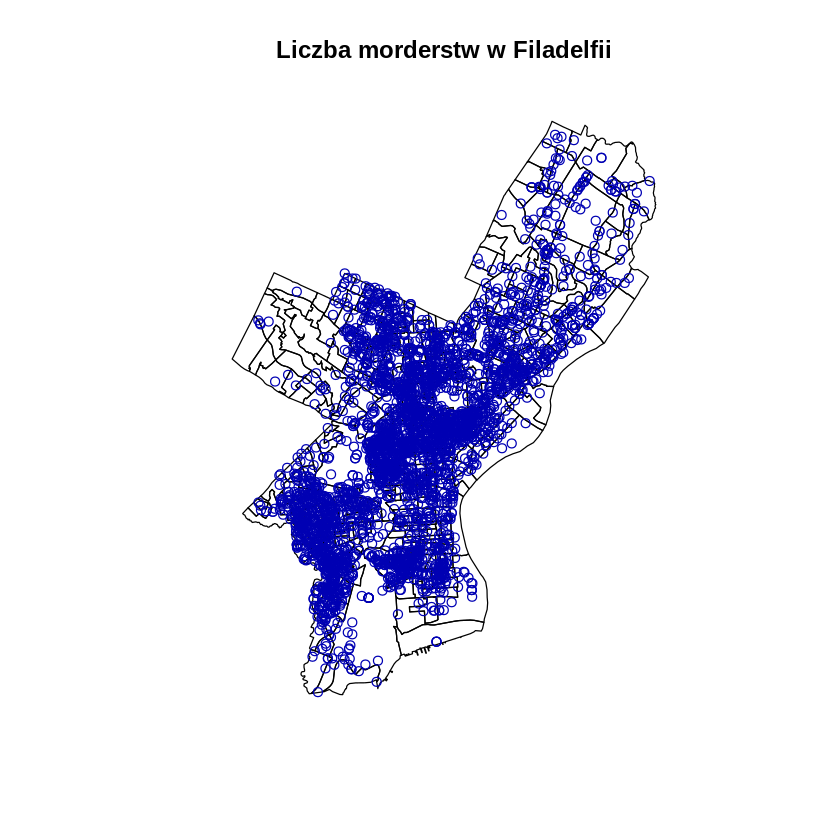

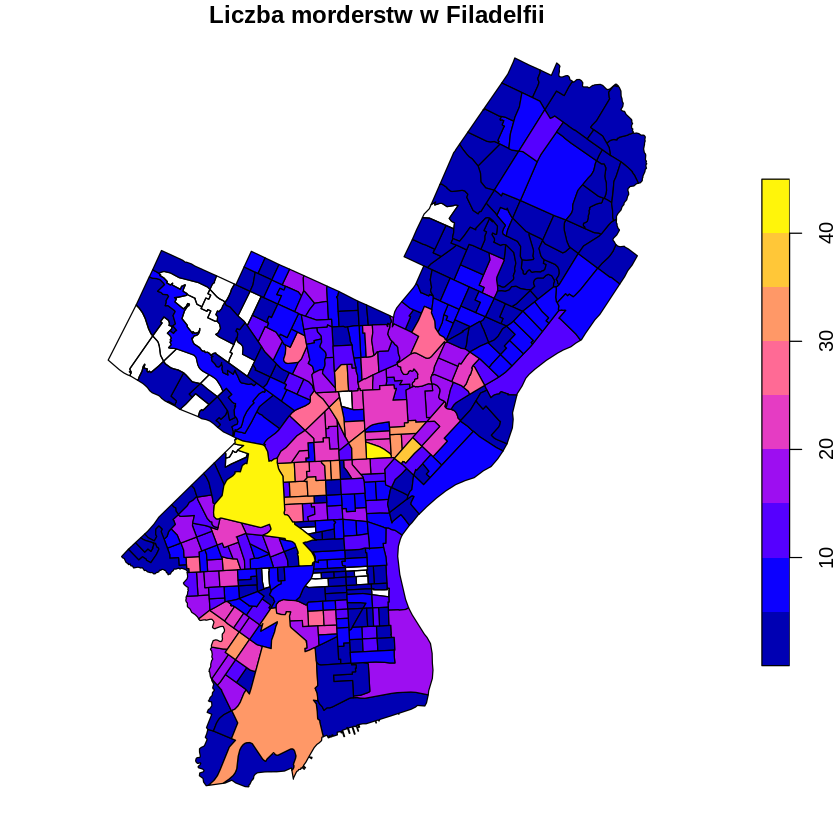

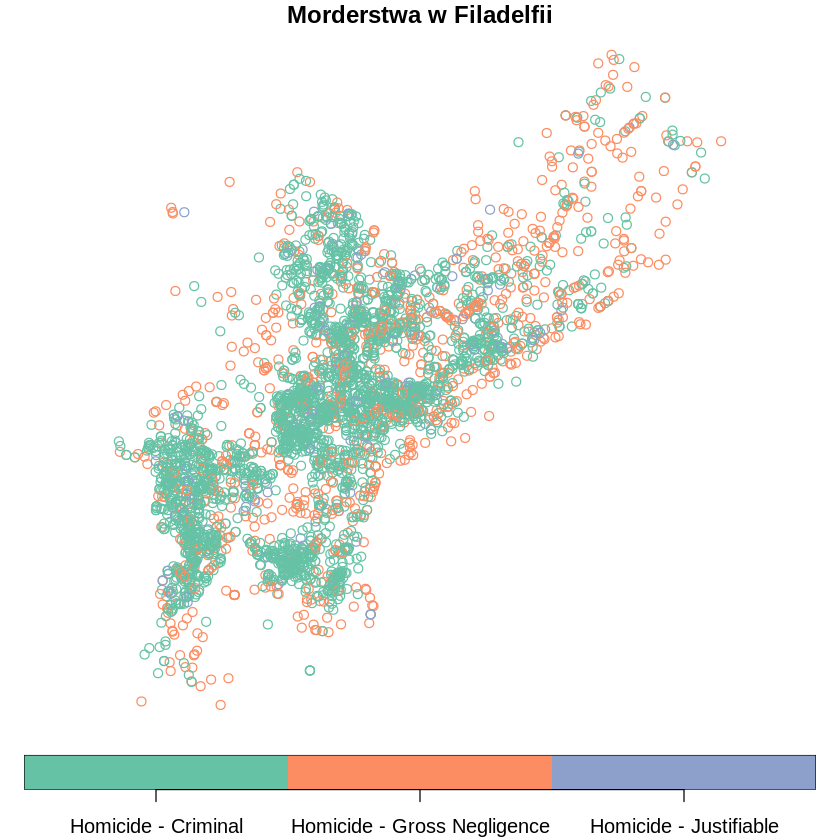

In [28]:
# Number of murders in Phipadelphia
plot(st_geometry(philly), main="Liczba morderstw w Filadelfii")
plot(philly_hom_proj["OBJ_ID"], add=TRUE)
plot(philly_aggr, main="Liczba morderstw w Filadelfii")
plot(philly_hom["TEXT_GE"], main="Morderstwa w Filadelfii", key.pos=1, key.length=1.0)